# Fundamentos de la Programación (Grado en Ingeniería de la Salud)
## Ejercicio "Vinos" (18 de enero de 2018)

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [1]:
import csv
from matplotlib import pyplot as plt
from collections import namedtuple, Counter
from statistics import mean

## 1. Carga de datos (0.75 puntos)

Tomaremos los datos de un fichero de entrada llamado <code>wine_reviews.csv</code> en el que ha datos de valoraciones realizadas por usuarios sobre distintos vinos. El fichero se encuentra en la carpeta <code>./data</code>. Cada línea del fichero de entrada contiene las siguientes informaciones:

- **country:** país de procedencia del vino
- **province:** provincia de procendencia del vino
- **points:** puntos otorgados en la valoración (de 0 a 100)
- **price:** precio de la botella
- **variety:** variedad de uva utilizadas para crear el vino

He aquí un fragmento con las primeras líneas del fichero de entrada:

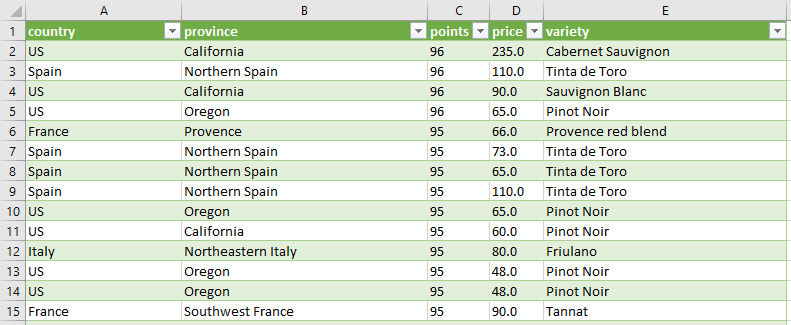

La primera función que implementaremos será la de lectura. Será la encargada de leer los datos del fichero de entrada y cargarlos en una lista de tuplas:

In [2]:
Valoracion = namedtuple('Valoracion', 'pais provincia puntos precio variedad')

def lee_valoraciones(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de registros
    
    ENTRADA:
       - fichero: nombre del fichero de entrada
    SALIDA:
       - lista de registros -> [Valoracion(str, str, int, float, str)]

    Hay que transformar ciertos elementos de la entrada en valores numéricos
    para que puedan ser procesados posteriormente.
    '''
    registros = []
    with open(fichero, 'r', encoding='utf-8') as f:
        lector = csv.reader(f)
        registros = [Valoracion(pais, provincia, int(puntos), float(precio), variedad)
                    for pais, provincia, puntos, precio, variedad in lector]
    return registros

In [3]:
# Test de la función lee_valoraciones
REGISTROS = lee_valoraciones('./data/wine_reviews.csv')

# La salida esperada de la siguiente instrucción es: 
#    137230 [Valoracion(pais='US', provincia='California', puntos=96, precio=235.0, variedad='Cabernet Sauvignon'), 
#            Valoracion(pais='Spain', provincia='Northern Spain', puntos=96, precio=110.0, variedad='Tinta de Toro')]
print(len(REGISTROS), REGISTROS[:2])

137230 [Valoracion(pais='US', provincia='California', puntos=96, precio=235.0, variedad='Cabernet Sauvignon'), Valoracion(pais='Spain', provincia='Northern Spain', puntos=96, precio=110.0, variedad='Tinta de Toro')]


## 2. Consulta y filtrado (7.25 puntos)

Una vez que hemos cargado los datos en una estructura en memoria ya podemos empezar a procesarlos. En esta sección implementaremos algunas funciones de consulta y filtrado que nos permitirán trabajar con ellos.

La primera función que implementaremos se llama <code>numero_valoraciones_por_pais</code>. La función toma una lista de tuplas de registros y una lista de paises, y cuenta cuántas valoraciones hay por cada país de la lista:

In [4]:
def numero_valoraciones_por_pais(registros, paises):
    ''' Calcula el número de registros que hay por cada país de la lista de paises
        Los elementos de la lista de salida estarán alineados (se corresponderán en orden)
        con los de la lista de paises de entrada
    
    ENTRADA:
       - registros: lista de registros -> [Valoracion(str, str, int, float, str)]
    SALIDA:
       - lista alineada del número de valoraciones para cada país -> [int]
    '''
    valoraciones_por_pais = Counter(r.pais for r in registros)
    valoraciones = [valoraciones_por_pais[pais] for pais in paises]
    return valoraciones

In [5]:
# Test de la función numero_valoraciones_por_pais
valoraciones = numero_valoraciones_por_pais(REGISTROS, ['US', 'France', 'Spain', 'Italy'])

# La salida esperada de la siguiente instrucción es: 
#   [62139, 14785, 8160, 18784]
print(valoraciones)

[62139, 14785, 8160, 18784]


La segunda función se llama <code>calcula_provincias_excelentes</code>. Toma una lista de registros y produce como salida un conjunto con los nombres de las provincias que tienen, al menos, una valoración con 99 o más puntos:


In [6]:
def calcula_provincias_excelentes(registros):
    ''' Calcula los deportistas que tienen medalla de oro
    
    ENTRADA:
       - registros: lista de registros -> [Valoracion(str, str, int, float, str)]
    SALIDA:
       - conjunto de provincias con, al menos, una valoración muy buena -> {str}
    '''
    return {r.provincia for r in registros if r.puntos>=99}

In [7]:
# Test de la función calcula_provincias_excelentes
provincias = calcula_provincias_excelentes(REGISTROS)

# La salida esperada de la siguiente instrucción es: 
#   10 ['Bordeaux', 'California', 'Champagne', 'Douro', 'Oregon', 'Piedmont', 'Rhône Valley', 'Tuscany', 'Victoria', 'Washington'] 
print(len(provincias), sorted(provincias))

10 ['Bordeaux', 'California', 'Champagne', 'Douro', 'Oregon', 'Piedmont', 'Rhône Valley', 'Tuscany', 'Victoria', 'Washington']


La siguiente función se llama <code>filtra_por_precio</code>. Toma una lista de registros, un precio mínimo y otro máximo, y selecciona solo los registros que se encuentren entre ambos precios:

In [8]:
def filtra_por_precio(registros, minimo=None, maximo=None):
    ''' Selecciona registros inlcuidos en un rango de precios
    
    ENTRADA:
       - registros: lista de registros -> [Valoracion(str, str, int, float, str)]
       - minimo: precio mínimo -> int o 'None' si no se establece ningún mínimo
       - maximo: precio máximo -> int o 'None' si no se establece ningún máximo
    SALIDA:
       - lista de registros incluidos en el rango de precios -> [Valoracion(str, str, int, float, str)]
    '''
    precios = {r.precio for r in REGISTROS}
    if minimo == None:
        minimo = min(precios)
    if maximo == None:
        maximo = max(precios)
    filtrados = [r for r in registros if minimo <= r.precio <= maximo]
    return filtrados

In [9]:
# Test de la función filtra_por_precio

# La salida esperada de las siguientes instrucciones es: 
#   28730
#   33890
#   1577
print(len(filtra_por_precio(REGISTROS, 10, 15)))
print(len(filtra_por_precio(REGISTROS, None, 15)))
print(len(filtra_por_precio(REGISTROS, 150, None)))

28730
33890
1577


La siguiente función de esta sección se llama <code>puntuacion_media_por_provincia</code>. Toma como entrada una lista de registros, y produce como salida un diccionario cuyas claves son las distintas provincias, y los valores son la media de puntuación obtenida en las valoraciones de cada provincia.

In [10]:
def puntuacion_media_por_provincia(registros):
    ''' Crea un diccionario con la puntuación media de las valoraciones para cada provincia
    
    ENTRADA:
       - registros: lista de registros -> [Valoracion(str, str, int, float, str)]
    SALIDA:
       - diccionario con la puntuación media por provincia -> {str: float}
    '''
    puntuaciones_medias = dict()
    provincias = {r.provincia for r in registros}
    for provincia in provincias:
        puntuaciones = [r.puntos for r in registros if r.provincia == provincia]
        puntuaciones_medias[provincia] = mean(puntuaciones)
    return puntuaciones_medias

In [11]:
# Test de la función puntuacion_media_por_provincia
puntuaciones = puntuacion_media_por_provincia(REGISTROS)

# La salida esperada de las siguientes instrucciones es: 
#    Martinborough Terrace          93.00
#    England                        92.75
#    Santa Cruz                     92.50
#    Puente Alto                    91.64
#    Eisenberg                      91.33
provincias = sorted(puntuaciones, key=puntuaciones.get, reverse=True)
for provincia in provincias[:5]:
    print('{:30} {:4.2f}'.format(provincia, puntuaciones[provincia]))

Martinborough Terrace          93.00
England                        92.75
Santa Cruz                     92.50
Puente Alto                    91.64
Vinho da Mesa                  91.33


## 3. Visualización (2 puntos)

La función de visualización que implementaremos será <code>muestra_medias_por_pais</code>. Toma como entrada una lista de registros y genera un diagrama de puntos en el que se muestra la puntuación media y el precio medio obtenidos en las valoraciones de cada pais. 

In [12]:
def muestra_medias_por_pais(registros):
    ''' Genera un diagrama de puntos con la puntuación y el precio medio por pais
        
        ENTRADA:
           - registros: lista de registros -> [Valoracion(str, str, int, float, str)]
        SALIDA EN PANTALLA:
           - diagrama de puntos con la puntuación y el precio medio por pais
           
        Se usarán las siguientes instrucciones matplotlib para generar la curva:
            plt.figure(figsize=(15,10))    
            for i,pais in enumerate(paises):
                x = puntuaciones_medias[i]
                y = precios_medios[i]
                plt.scatter(x, y, color='red')
                plt.text(x+0.05, y+0.05, pais, fontsize=9)
            plt.ylabel('precios medios')
            plt.xlabel('puntuaciones medias')
            plt.show()
            
        Donde las tres variables usadas significan lo siguiente:
            - paises: lista de paises presentes en las valoraciones
            - puntuaciones_medias: lista (alineada con la anterior) con la puntuación media para cada país
            - precios_medios: lista (alineada con la anterior) con el precio medio para cada país
    '''
    paises = list({r.pais for r in registros})
    puntuaciones_medias = []
    precios_medios = []
    
    for pais in paises:
        valoraciones = [r for r in registros if r.pais==pais]
        puntuaciones_medias.append(mean(r.puntos for r in valoraciones))
        precios_medios.append(mean(r.precio for r in valoraciones))
    
    plt.figure(figsize=(15,10))    
    for i,pais in enumerate(paises):
        x = puntuaciones_medias[i]
        y = precios_medios[i]
        plt.scatter(x, y, color='red')
        plt.text(x+0.05, y+0.05, pais, fontsize=9)
    plt.ylabel('precios medios')
    plt.xlabel('puntuaciones medias')
    plt.show()

La salida de la celda de test debería ser la siguiente:
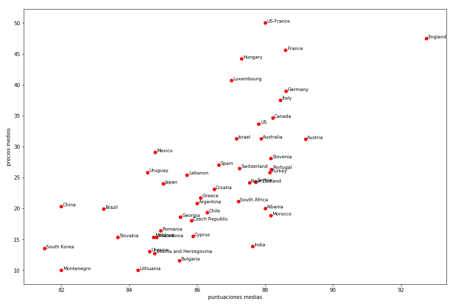

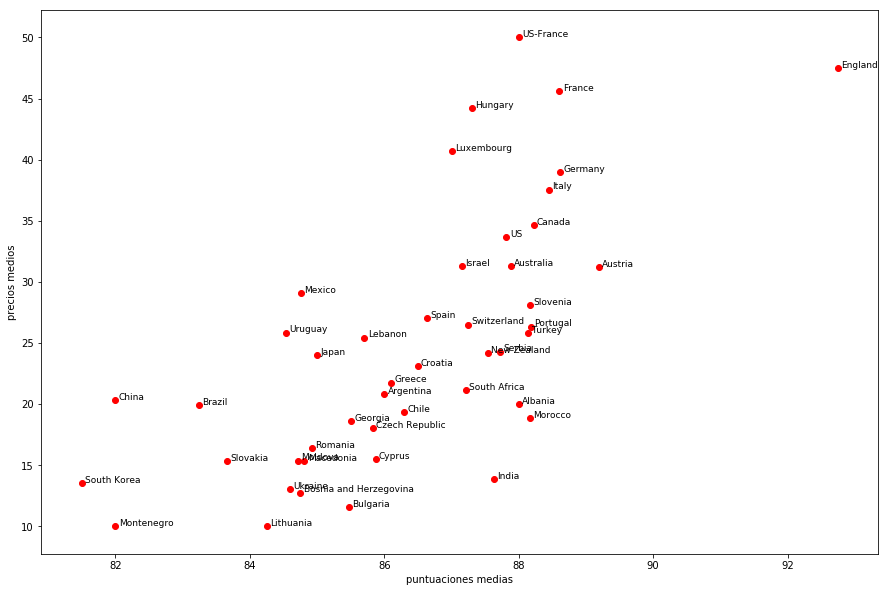

In [13]:
# Test de la función muestra_medias_por_pais
muestra_medias_por_pais(REGISTROS)